In [1]:
import time
import os
import pylab as plt
import numpy as np
from tqdm import tqdm
%matplotlib inline

In [2]:
def run(mesh_size, boundary_conditions, nproc):
    formulation = "{}\n{}\n{}\n{}\n{}\n".format(mesh_size, 
                                                    boundary_conditions[0], 
                                                    boundary_conditions[1], 
                                                    boundary_conditions[2], 
                                                    boundary_conditions[3])
    with open('formulation', mode='w') as f:
        f.writelines(formulation)
    
    os.system("mpif90 program.f90 -o solve")
    os.system("rm result")
    os.system("mpirun -np {} solve".format(nproc))
    return True

In [3]:
def plot():
    phi = list()
    with open('result', mode='r') as f:
        nx = int(f.readline().strip())
        ny = int(f.readline().strip())
        for line in f.readlines():
            phi_str = line.strip().split(' ')
            phi_ls = list()
            for s in phi_str:
                try:
                    phi_ls.append(float(s))
                except:
                    pass
            phi.append(phi_ls)
    phi = np.array(phi)
    plt.imshow(phi, cmap='hsv')
    plt.colorbar()
    plt.show()

In [4]:
run(60, [10,10,10,10], 2)

True

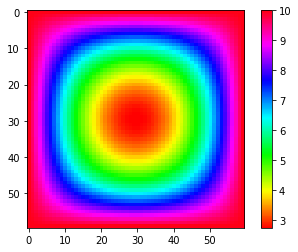

In [5]:
plot()

In [15]:
times = list()
nproc = np.arange(2, 20)

In [16]:
for n in tqdm(nproc):
    start = time.time()
    run(500, [10,-10,10,-10], n)
    times.append(time.time() - start)

100%|██████████| 18/18 [09:12<00:00, 30.72s/it]


In [17]:
import seaborn as sns

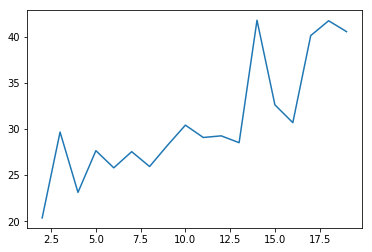

In [18]:
plt.plot(nproc, times)